In [29]:
import requests
import os
from bs4 import BeautifulSoup
import urllib
from nltk import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import PyPDF2
import seaborn as sns

We're going to download all the PDFs from the main page of the Carnarvon Elementary School wesbite. To do this we'll use the following packages: requests, os, BeautifulSoup, and urllib.

In [2]:
url = input("Enter URL:")
# Carnarvon: http://go.vsb.bc.ca/schools/crn/Pages/default.aspx
# Stratchona: http://go.vsb.bc.ca/schools/strathcona/Pages/default.aspx
response = requests.get(url)

# parse website
soup = BeautifulSoup(response.content, "html.parser")

Enter URL:http://go.vsb.bc.ca/schools/strathcona/Pages/default.aspx


In [3]:
i = 0

# <a> tags with href
for tag in soup.findAll('a', href = True):
    tag["href"] = urllib.parse.urljoin(url, tag["href"]) 
    
# get extension (splitext) from the last name of the full url (basename)
# splitext splits it into the filename and extension
# [1] gives the second part ie extension
    if os.path.splitext(os.path.basename(tag["href"]))[1] == ".pdf":
        current = requests.get(tag["href"])
        print("Downloading: %s" % (os.path.basename(tag["href"])))     
        f = open(os.path.basename(tag["href"]), "wb")        
        f.write(current.content)
        f.close()
        i += 1

print("\n Downloaded %d files" %(i+1))

Downloading: 03939028.pdf
Downloading: Snow Event Notification.pdf
Downloading: Parent Letter_Curriculum Timeline.pdf
Downloading: December 2016 Newsletter.pdf
Downloading: November 2016 Newsletter.pdf
Downloading: October 2016 Newsletter.pdf
Downloading: Parents_Public Schools outgoing.pdf
Downloading: September 2016 Newsletter.pdf

 Downloaded 9 files


Now that we've downloaded the PDFs, let's do some sentiment analysis.

First, we have to extract the text, then format the extracted text so that it's easy to analyze.

We'll look at the text sentence by sentence, so we need to extract and separate every sentence in the text.

In [4]:
def get_sentiment_all_pages(file):
    
    pdf_file = open(file, "rb")
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    n_pages = read_pdf.getNumPages()

    # Get text
    pages = [] # list of content of each page
    for pg in range(n_pages):
        page = read_pdf.getPage(pg)
        page_content = page.extractText() # string
        pages.append(page_content)
                    
    # sentiment per page
    
    print("\n" + file + "\n")
    
    sentiment = SentimentIntensityAnalyzer()
    count = 0
    for page in pages:
        ss = sentiment.polarity_scores(page)
        print("Page " + str(count))
        count += 1
        for k in sorted(ss):
            print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

From a quick comparison, it seems like Kitsilano high school's newsletters use less positive language than that of the elementary schools.

Vader is from: Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

In [40]:
def plot_sentiment(ss):
    result = []
    for k in sorted(ss):
        result.append(ss[k])
    return sns.barplot(x=["compound", "neg", "neutral", "pos"], y=result)

In [47]:
def get_sentiment_one_page(file, page_number):
    
    pdf_file = open(file, "rb")
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    n_pages = read_pdf.getNumPages()

    # Get text
    page = read_pdf.getPage(page_number)
    page = page.extractText() # string
                    
    # sentiment per page
    
    print("\n" + file + "\n")
    
    sentiment = SentimentIntensityAnalyzer()
    ss = sentiment.polarity_scores(page)
    plot_sentiment(ss)
    print("Page " + str(page_number))
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()


Strathcona Elementary School\September 2016 Newsletter.pdf

Page 2
compound: 0.9545, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 


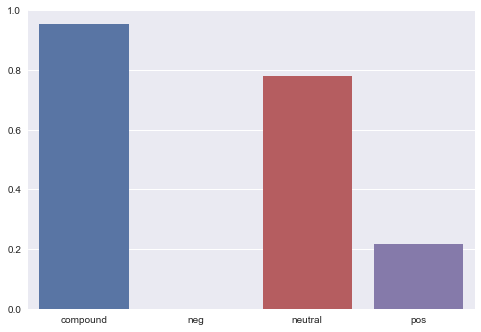

In [57]:
get_sentiment_one_page("Strathcona Elementary School\September 2016 Newsletter.pdf",2)


Strathcona Elementary School\September 2016 Newsletter.pdf

Page 2
compound: 0.9545, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 


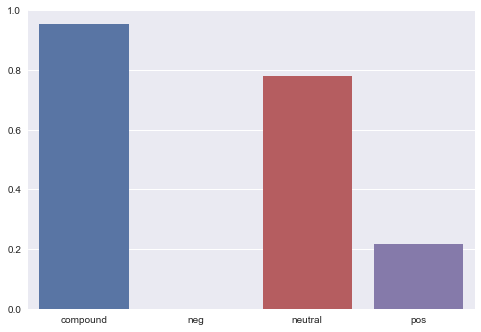

In [60]:
get_sentiment_one_page("Strathcona Elementary School\September 2016 Newsletter.pdf",2)


Kitsilano Secondary School\Summer 2016 Newsletter.pdf

Page 2
compound: 0.8718, 
neg: 0.004, 
neu: 0.953, 
pos: 0.043, 


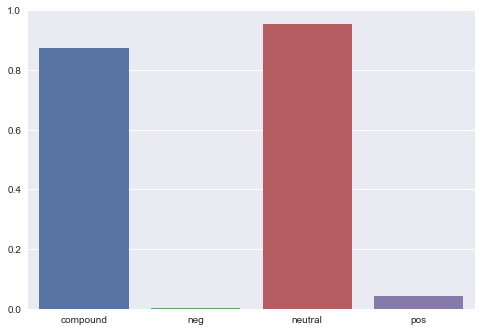

In [61]:
get_sentiment_one_page("Kitsilano Secondary School\Summer 2016 Newsletter.pdf",2)

In [75]:
file = "Carnarvon Elementary School\September Newsletter 2016.pdf"
pdf_file = open(file, "rb")
read_pdf = PyPDF2.PdfFileReader(pdf_file)
n_pages = read_pdf.getNumPages()
pages = []
for pg in range(n_pages):
    page = read_pdf.getPage(pg)
    page_content = page.extractText() # string
    pages.append(page_content)

In [84]:
def get_sentiment_doc(file):
    
    pdf_file = open(file, "rb")
    read_pdf = PyPDF2.PdfFileReader(pdf_file)
    n_pages = read_pdf.getNumPages()

    # Get text
    pages = [] # list of content of each page
    for pg in range(n_pages):
        page = read_pdf.getPage(pg)
        page_content = page.extractText() # string
        pages.append(page_content)
        all_pages = str(pages)           
    # sentiment per page
    
    print("\n" + file + "\n")
    
    sentiment = SentimentIntensityAnalyzer()
    ss = sentiment.polarity_scores(all_pages)
    plot_sentiment(ss)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()


Carnarvon Elementary School\September Newsletter 2016.pdf

compound: 0.9995, 
neg: 0.008, 
neu: 0.899, 
pos: 0.093, 


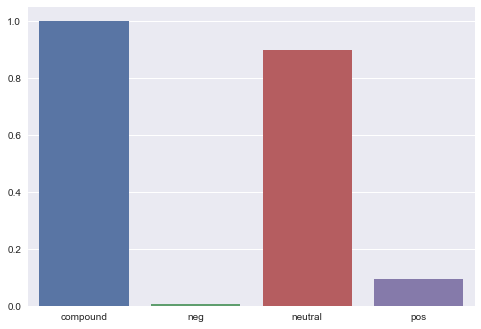

In [85]:
get_sentiment_doc("Carnarvon Elementary School\September Newsletter 2016.pdf")